In [1]:
# imports, note scipy>=1.8 is needed
import numpy as np
import random
import networkx as nx
import re
from IPython.display import Image
import matplotlib.pyplot as plt
import collections
from matplotlib.ticker import MaxNLocator
import community
import statistics as stats
from collections import Counter
import seaborn as sns
from matplotlib import rc
import pandas as pd
import csv
import sklearn.cluster
import scipy
import plotly
import plotly.graph_objs as go
print("done")

done


In [2]:

file = open("list_of_characters.txt", "r", encoding="utf8")
content = file.read()
file.close()

list_of_characters = re.split(' \n | \n|\n |\n', content)
for i in range(len(list_of_characters)):
    list_of_characters[i] = list_of_characters[i].split(' / ')

file = open("war_and_peace.txt", encoding="utf8")
# print(file.read())
content = file.read()
file.close()

chapter_list = content.split("CHAPTER")

print(chapter_list[40])

# print(len(chapter_list))

# found a name at least founded once in the text not the same as one in the list

print(len(list_of_characters))

counter=0
for character in list_of_characters:
    appears = False
    for name in character:
        # print(character)
        for i in range(len(chapter_list)):
            if chapter_list[i].find(name) != -1:
                appears = True
    if not appears:
        list_of_characters.remove(character)
        # print(character)



print(len(list_of_characters))

 XII

    
186
121


10


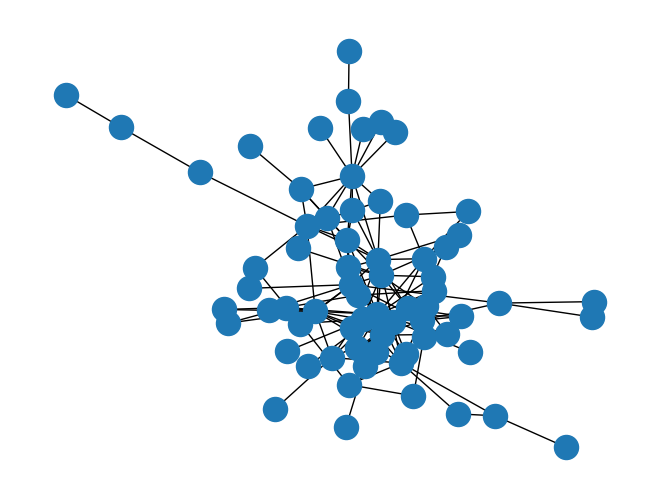

In [3]:
# make graph


G = nx.Graph()

for character in list_of_characters:
    G.add_node(str(character))

for chapter in chapter_list:
    characters_appear = []
    for character in list_of_characters:
        for name in character:
            if chapter.find(name) != -1:
                characters_appear.append(character)
    for character1 in characters_appear:
        for character2 in characters_appear:
            if (character1!=character2):
                G.add_edge(str(character1), str(character2))

# print(G.edges)
remove = [node for node, degree in dict(G.degree()).items() if degree ==0]
G.remove_nodes_from(remove)


nb = nx.number_connected_components(G)
print(nb)

largest_cc = max(nx.connected_components(G), key=len)

S = G.subgraph(largest_cc).copy()
nx.draw(S, cmap = plt.get_cmap('rainbow'))



